In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [31]:
df = pd.read_csv("../btcNews_Data.csv")

In [5]:
df.head()

,date,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,top_9,top_10,top_11,top_12,top_13,top_14,top_15,top_16,top_17,top_18,top_19,top_20,top_21,top_22,top_23,top_24,top_25,top_26,top_27,top_28,top_29,top_30,top_31,top_32,top_33,top_34,top_35,price,open,high,low,vol.,change %
0,12/07/2015,bitcoin the next logical step in the rise of u...,the blockchain towards crypto sovereignty ...,coinbase outage is a reminder to not store bit...,2015 q1 bitcoin vc investment trumps the numbe...,future use cases for blockhain technology dis...,poloniex leaves new york due to bitlicense ...,what is bitcoin xt amp what is happening wit...,mainstream medias failure with bitcoin reporti...,bitcoin a technological innovation restoring ...,save lives earn bitcoin with new ems signpos...,future use cases for blockchain technology pr...,land of the rising bitcoin bitcoin,fiat cannot support the new economy we need b...,blockchain alliance bitcoin and law enforceme...,,has released an enterprise ready blockchain...,blockstream to transmit bitcoin data to earth ...,pr ambrosus partners with trek therapeutics t...,goldman sachs technical analyst predicts bitco...,we ve created a telegram channel to display th...,bitcoin s current exchange rate is 4325 46 usd...,cryptocurrency ping tracking,porn star tempts russian prime minister to leg...,bitcoin endures instantaneous flash crash on m...,microsoft press office we ve restored bitcoi...,bangladesh authorities on hunt for bitcoin t...,,us lawmakers eye national crypto regulation ...,pr smart contract platform fabric token raise...,rt lawsuit,assemble protocol asm is now supported on co...,leveraging ongoing investment trend upcoming ...,the avalanche web wallet experienced an outag...,ant group and tencent have all been key pla...,opponents of the tax on crypto profits outnum...,f2pool was the top bitcoin mining operation w...,310.4,292.0,315.9,291.3,120.70K,6.33%
1,13/07/2015,bitgive foundation announces new initiatives a...,bitcoin in review interesting trends in q1 of...,cloudminr user accounts hacked data sold for ...,the block size debate and sock puppet accusa...,future use cases for blockchain technology p...,the low hanging fruit of bitcoin adoption vi...,scotland has plans to develop its own digital ...,bitcoin charitable donations the tables are s...,peek inside coinpoint a full service bitcoin ...,the forum s all star ama event,decentralization is key for car innovation to ...,meerkat star suzanne nguyen dreams of bitcoin...,what do you think has segwit been released ye...,good bitcoin bad bitcoin avoiding fraud amp...,uk regulator warns investors bitcoin trading i...,venezuelan bitcoin mining continues despite go...,fisco designed the bond like a regular corpor...,bitcoin cash now commands over 20 of btc s to...,pr robert binning ceo of streamspace to spea...,ukraine proposes law to completely legalize cr...,russia s finance ministry proposes registering...,chinese power company responds to document ind...,pr nuls the global open source platform for b...,pr game machine first blockchain ecosystem ...,south korean regulator supports normal crypt...,digitalx,how to protect yourself against dns attacks wh...,,new party in ukraine to fund itself only with ...,a single operator deploys over 350 new bitcoi...,nigeria s latest total traded volumes figure w...,the next bitcoin cash may 15th upgrade will br...,while consumer interest in cryptocurrency ...,there are particular cryptos that are in my ...,of the 75 enforcement actions 43 were litiga...,NaN,290.4,310.4,310.9,276.9,146.85K,-6.47%
2,14/07/2015,keynote 2015 harnessing the distributed ledge...,cash back vs bitcoin why bitcoin can be super...,force or mathematics fiat vs cryptocurrency ...,the 9 most visited websites in the bitcoin eco...,future use cases of blockchain technology dec...,the kids keep asking bitcoin are we there ye...,barclays bank they come for the blockchain b...,back to the future bitcoin as a vehicle for i...,changing t

In [32]:
def last_unique_letter(s):
    unique_letters = ''.join(dict.fromkeys(s[::-1]))  # Reverse string and remove duplicates
    return unique_letters[0] if unique_letters else None

In [33]:
# Store the last unique letters in a list
last_unique_letters = [last_unique_letter(entry) for entry in df['vol.']]

In [34]:
list(set(last_unique_letters))

['K', 'M']

In [35]:
# Function to convert 'K' and 'M' to numeric values
def convert_to_numeric(val):
    if isinstance(val, str):
        if 'K' in val:
            return float(val.replace('K', '')) * 1e3
        elif 'M' in val:
            return float(val.replace('M', '')) * 1e6
    return float(val)
# Apply the conversion to the 'vol.' column
df['vol.'] = df['vol.'].apply(convert_to_numeric)

In [36]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')
df = df.set_index('date')
# Remove '%' and convert 'change %' to a numeric column
df['change %'] = df['change %'].str.replace('%', '').astype(float)

In [37]:
df.sample()

,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,top_9,top_10,top_11,top_12,top_13,top_14,top_15,top_16,top_17,top_18,top_19,top_20,top_21,top_22,top_23,top_24,top_25,top_26,top_27,top_28,top_29,top_30,top_31,top_32,top_33,top_34,top_35,price,open,high,low,vol.,change %
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-05-22,new experiment allows you to play monopoly on ...,governments amp central banks are now fundin...,scottish brexit research paper looks to bitc...,new features in opendime s next cash like bitc...,bitcoin experiences an intense flow of new mon...,swedish officials settle first debt in bitcoin...,australian taxation office creates task force ...,pr repo blockchain set to release repo coin ...,ico,chilean president considering regulation of cr...,bis gm argues new cryptos are the alchemy of ...,sec has no jurisdiction to look at bitcoin for...,kucoin exchange raises 20 million in series a...,right after the trade took place three men ca...,snoop dogg says he has been around long enough...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,439.6,443.6,444.2,436.9,28740.0,-0.91


In [38]:
df.columns

Index(['top_0', 'top_1', 'top_2', 'top_3', 'top_4', 'top_5', 'top_6', 'top_7',
       'top_8', 'top_9', 'top_10', 'top_11', 'top_12', 'top_13', 'top_14',
       'top_15', 'top_16', 'top_17', 'top_18', 'top_19', 'top_20', 'top_21',
       'top_22', 'top_23', 'top_24', 'top_25', 'top_26', 'top_27', 'top_28',
       'top_29', 'top_30', 'top_31', 'top_32', 'top_33', 'top_34', 'top_35',
       'price', 'open', 'high', 'low', 'vol.', 'change %'],
      dtype='object')

In [49]:
df_n = df[['price', 'open', 'high', 'low', 'vol.', 'change %']]

In [50]:
df_n.sample()

,price,open,high,low,vol.,change %
date,,,,,,
2017-11-15,7283.2,6597.1,7330.1,6596.9,131120.0,10.4


In [41]:
df_n.corr()

,price,open,high,low,vol.,change %
price,1.000000,0.998516,0.999347,0.999167,-0.024542,0.017622
open,0.998516,1.000000,0.999348,0.998669,-0.023767,-0.017632
high,0.999347,0.999348,1.000000,0.998580,-0.024383,0.000911
low,0.999167,0.998669,0.998580,1.000000,-0.024110,0.004670
vol.,-0.024542,-0.023767,-0.024383,-0.024110,1.000000,-0.004923
change %,0.017622,-0.017632,0.000911,0.004670,-0.004923,1.000000


## Model Development

In [25]:
from prophet import Prophet

In [51]:
df_n.reset_index(inplace=True)

df_n.rename(columns={'date': 'ds', 'price': 'y'}, inplace=True)

/var/folders/tt/ndzk13v944z9y5c79vdqq_mr0000gp/T/ipykernel_73659/260662738.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n.rename(columns={'date': 'ds', 'price': 'y'}, inplace=True)


In [52]:
df_n.sample()

,ds,y,open,high,low,vol.,change %
1042,2018-05-27,7366.7,7361.9,7411.8,7267.5,103290.0,0.07


In [53]:
# Split into training and testing sets (80-20 split)
train_size_fbp = int(len(df_n) * 0.6)
train_fbp = df_n.iloc[:train_size_fbp]
test_fbp = df_n.iloc[train_size_fbp:]

#### Using date, and open columns

In [54]:

# Initialize the Prophet model
model_fbp = Prophet()
model_fbp.add_regressor('open')

In [55]:
# Fit the model on the training data
model_fbp.fit(train_fbp)

23:48:13 - cmdstanpy - INFO - Chain [1] start processing
23:48:13 - cmdstanpy - INFO - Chain [1] done processing


In [68]:
future_test = test_fbp[['ds','open']]
# Predict the future values
forecast_fbp = model_fbp.predict(future_test)
# Extract the predicted values for the test period
predictions_fbp = forecast_fbp[['ds', 'yhat']]

# Optionally, combine actual and predicted values in a DataFrame for comparison
# df_prophet_results = test_fbp.copy()
# df_prophet_results['Predicted_Price'] = predictions_fbp['yhat'].values

In [70]:
# forecast_fbp

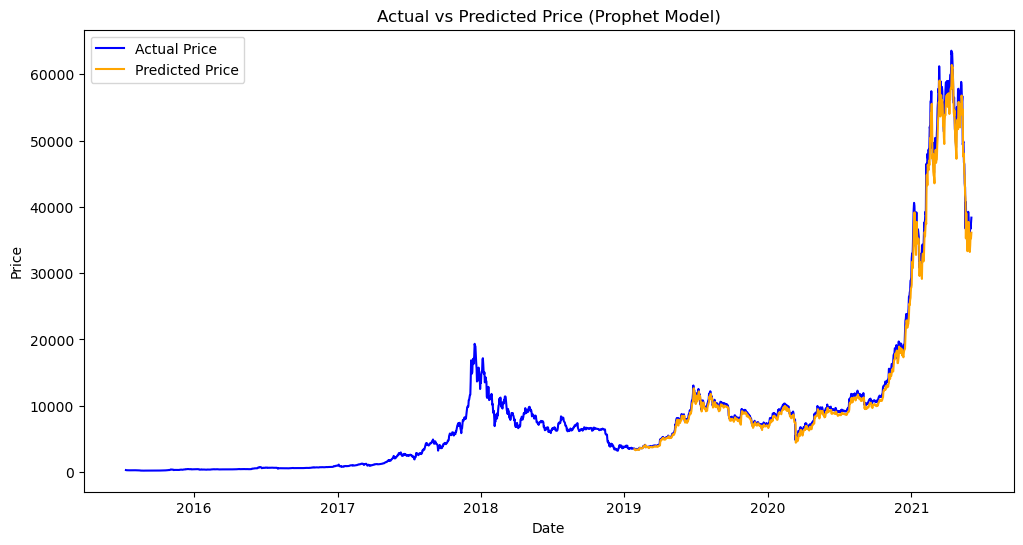

In [66]:
plt.figure(figsize=(12, 6))
plt.plot(df_n['ds'],df_n['y'], label='Actual Price', color='blue')
plt.plot(predictions_fbp['ds'], predictions_fbp['yhat'], label='Predicted Price', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price (Prophet Model)')
plt.legend()
plt.show()

In [130]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_metrics(test_values, predicted_values):
    """
    Function to calculate and display evaluation metrics for a model.
    
    Parameters:
    test_values (pd.Series or np.array): Actual values (ground truth)
    predicted_values (pd.Series or np.array): Predicted values by the model
    
    Returns:
    dict: A dictionary containing all the calculated metrics
    """
    # Calculate the metrics
    mae = mean_absolute_error(test_values, predicted_values)
    mse = mean_squared_error(test_values, predicted_values)
    rmse = mean_squared_error(test_values, predicted_values, squared=False)  # RMSE is the square root of MSE
    # mape = (abs((test_values - predicted_values) / test_values).mean()) * 100
    r2 = r2_score(test_values, predicted_values)
    
    # Display the results
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    # print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
    print(f"R-squared (R²): {r2}")
    
    # Return metrics as a dictionary for further use if needed
    return {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        # "MAPE": mape,
        "R²": r2
    }

# Example of how to use the function
# metrics = calculate_metrics(test_fbp['y'], predictions_fbp['yhat'])


In [74]:
calculate_metrics(test_fbp['y'], predictions_fbp['yhat'])

Mean Absolute Error (MAE): 798.7783971171958
Mean Squared Error (MSE): 1701490.2049353854
Root Mean Squared Error (RMSE): 1304.4118233653762
Mean Absolute Percentage Error (MAPE): nan%
R-squared (R²): 0.993037759151306


{'MAE': 798.7783971171958,
 'MSE': 1701490.2049353854,
 'RMSE': 1304.4118233653762,
 'MAPE': nan,
 'R²': 0.993037759151306}

In [ ]:
#### With Lag values

#### With Lag values

In [75]:

# Create the lagged columns for 'open', 'vol.', and 'change %'
df_n['lag1_open'] = df_n['open'].shift(1)
df_n['lag1_vol'] = df_n['vol.'].shift(1)
df_n['lag1_change_pct'] = df_n['change %'].shift(1)

# Replace NaN values in lagged columns with 0
df_n[['lag1_open', 'lag1_vol', 'lag1_change_pct']] = df_n[['lag1_open', 'lag1_vol', 'lag1_change_pct']].fillna(0)


/var/folders/tt/ndzk13v944z9y5c79vdqq_mr0000gp/T/ipykernel_73659/4139733178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['lag1_open'] = df_n['open'].shift(1)
/var/folders/tt/ndzk13v944z9y5c79vdqq_mr0000gp/T/ipykernel_73659/4139733178.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['lag1_vol'] = df_n['vol.'].shift(1)
/var/folders/tt/ndzk13v944z9y5c79vdqq_mr0000gp/T/ipykernel_73659/4139733178.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [81]:
df_n.head()

,ds,y,open,high,low,vol.,change %,lag1_open,lag1_vol,lag1_change_pct
0,2015-07-12,310.4,292.0,315.9,291.3,120700.0,6.33,0.0,0.0,0.00
1,2015-07-13,290.4,310.4,310.9,276.9,146850.0,-6.47,292.0,120700.0,6.33
2,2015-07-14,287.0,290.4,297.0,285.2,60620.0,-1.17,310.4,146850.0,-6.47
3,2015-07-15,283.4,287.0,292.9,283.2,59580.0,-1.23,290.4,60620.0,-1.17
4,2015-07-16,276.6,283.4,290.8,273.3,121320.0,-2.41,287.0,59580.0,-1.23


In [92]:
df_lag = df_n.drop(df_n.index[0])

In [93]:
df_lag.head()

,ds,y,open,high,low,vol.,change %,lag1_open,lag1_vol,lag1_change_pct
1,2015-07-13,290.4,310.4,310.9,276.9,146850.0,-6.47,292.0,120700.0,6.33
2,2015-07-14,287.0,290.4,297.0,285.2,60620.0,-1.17,310.4,146850.0,-6.47
3,2015-07-15,283.4,287.0,292.9,283.2,59580.0,-1.23,290.4,60620.0,-1.17
4,2015-07-16,276.6,283.4,290.8,273.3,121320.0,-2.41,287.0,59580.0,-1.23
5,2015-07-17,279.6,276.6,280.8,271.2,62120.0,1.10,283.4,121320.0,-2.41


In [99]:
df_lag.corr()

,ds,y,open,high,low,vol.,change %,lag1_open,lag1_vol,lag1_change_pct
ds,1.000000,0.676985,0.676436,0.674831,0.679565,0.197698,0.001425,0.675890,0.198201,-0.000186
y,0.676985,1.000000,0.998515,0.999347,0.999167,-0.024642,0.018122,0.997231,-0.025237,0.015353
open,0.676436,0.998515,1.000000,0.999348,0.998669,-0.023867,-0.017153,0.998510,-0.024207,0.017120
high,0.674831,0.999347,0.999348,1.000000,0.998580,-0.024483,0.001399,0.998139,-0.025243,0.015432
low,0.679565,0.999167,0.998669,0.998580,1.000000,-0.024211,0.005164,0.996929,-0.024003,0.019573
vol.,0.197698,-0.024642,-0.023867,-0.024483,-0.024211,1.000000,-0.004713,-0.023340,0.780029,-0.002079
change %,0.001425,0.018122,-0.017153,0.001399,0.005164,-0.004713,1.000000,-0.015021,-0.029592,-0.050866
lag1_open,0.675890,0.997231,0.998510,0.998139,0.996929,-0.023340,-0.015021,1.000000,-0.023439,-0.018182
lag1_vol,0.198201,-0.025237,-0.024207,-0.025243,-0.024003,0.780029,-0.029592,-0.023439,1.000000,-0.004853
lag1_change_pct,-0.000186,0.015353,0.017120,0.015432,0.019573,-0.002079,-0.050866,-0.018182,-0.004853,1.000000


In [94]:
# Split into training and testing sets (80-20 split)
train_size_fbp_lag = int(len(df_lag) * 0.6)
train_fbp_lag = df_lag.iloc[:train_size_fbp_lag]
test_fbp_lag = df_lag.iloc[train_size_fbp:]

In [95]:
# Initialize the Prophet model
model_fbp_lag = Prophet()
model_fbp_lag.add_regressor('lag1_open')
model_fbp_lag.add_regressor('lag1_vol')
model_fbp_lag.add_regressor('lag1_change_pct')

In [96]:
# Fit the model on the training data
model_fbp_lag.fit(train_fbp_lag)


22:40:11 - cmdstanpy - INFO - Chain [1] start processing
22:40:11 - cmdstanpy - INFO - Chain [1] done processing


In [112]:
def plot_actual_vs_predicted(df_actual, df_predicted, actual_col='y', predicted_col='yhat', date_col='ds'):
    """
    Parameters:
    - df_actual (pd.DataFrame): DataFrame containing the actual values.
    - df_predicted (pd.DataFrame): DataFrame containing the predicted values.
    - actual_col (str): Column name for the actual values. Default is 'y'.
    - predicted_col (str): Column name for the predicted values. Default is 'yhat'.
    - date_col (str): Column name for the date values. Default is 'ds'.
    """
    plt.figure(figsize=(12, 6))
    
    # Plot actual values
    plt.plot(df_actual[date_col], df_actual[actual_col], label='Actual Price', color='blue')
    
    # Plot predicted values
    plt.plot(df_predicted[date_col], df_predicted[predicted_col], label='Predicted Price', color='orange')
    
    # Labeling
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Actual vs Predicted Price (Prophet Model)')
    plt.legend()
    
    # Show plot
    plt.show()

# Example usage
# plot_actual_vs_predicted(df_n, predictions_fbp_lag)


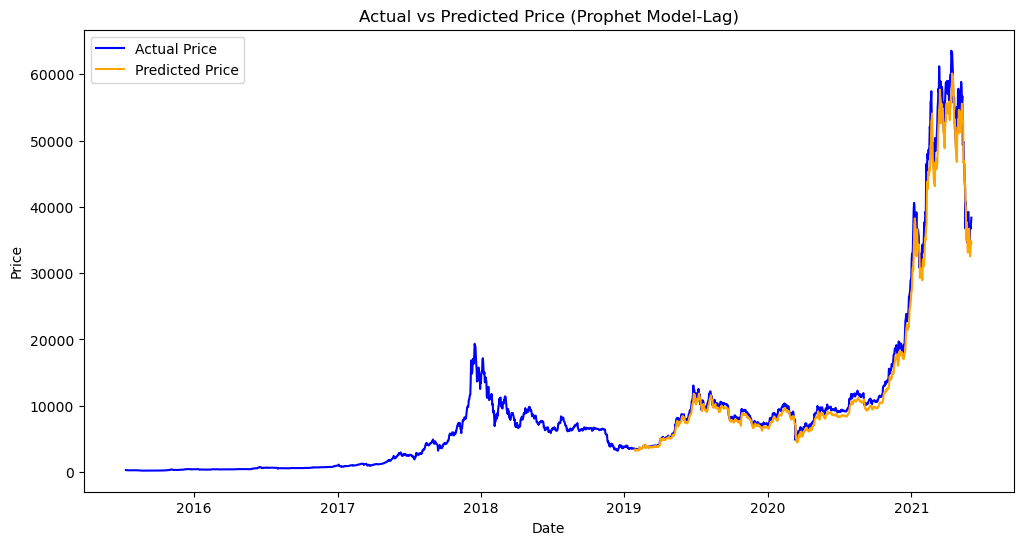

In [97]:
future_test_lag = test_fbp_lag[['ds','lag1_open','lag1_vol', 'lag1_change_pct']]
# Predict the future values
forecast_fbp_lag = model_fbp_lag.predict(future_test_lag)
# Extract the predicted values for the test period
predictions_fbp_lag = forecast_fbp_lag[['ds', 'yhat']]


plt.figure(figsize=(12, 6))
plt.plot(df_n['ds'],df_n['y'], label='Actual Price', color='blue')
plt.plot(predictions_fbp_lag['ds'], predictions_fbp_lag['yhat'], label='Predicted Price', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price (Prophet Model-Lag)')
plt.legend()
plt.show()

In [98]:
calculate_metrics(test_fbp_lag['y'], predictions_fbp_lag['yhat'])

Mean Absolute Error (MAE): 1162.9756619931306
Mean Squared Error (MSE): 3353613.124505406
Root Mean Squared Error (RMSE): 1831.2872861747842
Mean Absolute Percentage Error (MAPE): nan%
R-squared (R²): 0.9862828749129836


{'MAE': 1162.9756619931306,
 'MSE': 3353613.124505406,
 'RMSE': 1831.2872861747842,
 'MAPE': nan,
 'R²': 0.9862828749129836}

#### with moving average

In [107]:
df_ma = df_n[['ds', 'y', 'open', 'high', 'low', 'vol.', 'change %']]

In [108]:
df_ma.sample()

,ds,y,open,high,low,vol.,change %
1909,2020-10-10,11298.4,11053.5,11475.0,11053.1,65810.0,2.21


In [109]:
# Define the number of days for different periods
one_day = 1
seven_days = 7
one_month = 30  # approximately 30 days in a month
three_months = 90
six_months = 180
one_year = 365

# Simple Moving Averages (SMA) on 'y' (price)
df_ma['SMA_1_day'] = df_ma['y'].rolling(window=one_day).mean()
df_ma['SMA_7_days'] = df_ma['y'].rolling(window=seven_days).mean()
df_ma['SMA_1_month'] = df_ma['y'].rolling(window=one_month).mean()
df_ma['SMA_3_months'] = df_ma['y'].rolling(window=three_months).mean()
df_ma['SMA_6_months'] = df_ma['y'].rolling(window=six_months).mean()
df_ma['SMA_1_year'] = df_ma['y'].rolling(window=one_year).mean()

# Exponential Moving Averages (EMA) on 'y' (price)
df_ma['EMA_1_day'] = df_ma['y'].ewm(span=one_day, adjust=False).mean()
df_ma['EMA_7_days'] = df_ma['y'].ewm(span=seven_days, adjust=False).mean()
df_ma['EMA_1_month'] = df_ma['y'].ewm(span=one_month, adjust=False).mean()
df_ma['EMA_3_months'] = df_ma['y'].ewm(span=three_months, adjust=False).mean()
df_ma['EMA_6_months'] = df_ma['y'].ewm(span=six_months, adjust=False).mean()
df_ma['EMA_1_year'] = df_ma['y'].ewm(span=one_year, adjust=False).mean()

/var/folders/tt/ndzk13v944z9y5c79vdqq_mr0000gp/T/ipykernel_73659/229739778.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ma['SMA_1_day'] = df_ma['y'].rolling(window=one_day).mean()
/var/folders/tt/ndzk13v944z9y5c79vdqq_mr0000gp/T/ipykernel_73659/229739778.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ma['SMA_7_days'] = df_ma['y'].rolling(window=seven_days).mean()


In [110]:
df_ma.sample()

,ds,y,open,high,low,vol.,change %,SMA_1_day,SMA_7_days,SMA_1_month,SMA_3_months,SMA_6_months,SMA_1_year,EMA_1_day,EMA_7_days,EMA_1_month,EMA_3_months,EMA_6_months,EMA_1_year
1488,2019-08-16,10335.6,10300.9,10734.0,9788.6,798670.0,0.31,10335.6,10829.6,10638.663333,9979.581111,7425.981111,6269.511233,10335.6,10717.300969,10786.692627,9749.461436,8333.76312,7252.825192


In [111]:
df_ma.corr()

,ds,y,open,high,low,vol.,change %,SMA_1_day,SMA_7_days,SMA_1_month,SMA_3_months,SMA_6_months,SMA_1_year,EMA_1_day,EMA_7_days,EMA_1_month,EMA_3_months,EMA_6_months,EMA_1_year
ds,1.000000,0.676992,0.676444,0.674838,0.679572,0.197799,0.000193,0.676992,0.676463,0.674604,0.682284,0.735878,0.834148,0.676992,0.677201,0.678500,0.696278,0.737306,0.808762
y,0.676992,1.000000,0.998516,0.999347,0.999167,-0.024542,0.017622,1.000000,0.997138,0.984123,0.946849,0.906485,0.842741,1.000000,0.997972,0.987992,0.964788,0.943020,0.914118
open,0.676444,0.998516,1.000000,0.999348,0.998669,-0.023767,-0.017632,0.998516,0.998283,0.985680,0.949385,0.909264,0.845104,0.998516,0.998782,0.989571,0.966935,0.945341,0.916247
high,0.674838,0.999347,0.999348,1.000000,0.998580,-0.024383,0.000911,0.999347,0.998095,0.985453,0.948690,0.908134,0.843275,0.999347,0.998714,0.989336,0.966367,0.944454,0.914980
low,0.679572,0.999167,0.998669,0.998580,1.000000,-0.024110,0.004670,0.999167,0.996788,0.984067,0.947377,0.907582,0.845026,0.999167,0.997587,0.987851,0.965138,0.943846,0.915589
vol.,0.197799,-0.024542,-0.023767,-0.024383,-0.024110,1.000000,-0.004923,-0.024542,-0.023259,-0.021391,-0.015248,0.012629,0.084267,-0.024542,-0.022869,-0.018230,-0.002516,0.028332,0.078361
change %,0.000193,0.017622,-0.017632,0.000911,0.004670,-0.004923,1.000000,0.017622,-0.013508,-0.020840,-0.031789,-0.035888,-0.041793,0.017622,-0.009281,-0.018529,-0.025024,-0.028751,-0.029631
SMA_1_day,0.676992,1.000000,0.998516,0.999347,0.999167,-0.024542,0.017622,1.000000,0.997138,0.984123,0.946849,0.906485,0.842741,1.000000,0.997972,0.987992,0.964788,0.943020,0.914118
SMA_7_days,0.676463,0.997138,0.998283,0.998095,0.996788,-0.023259,-0.013508,0.997138,1.000000,0.989990,0.956047,0.916638,0.851630,0.997138,0.999838,0.993524,0.972574,0.951490,0.922064
SMA_1_month,0.674604,0.984123,0.985680,0.985453,0.984067,-0.021391,-0.020840,0.984123,0.989990,1.000000,0.982911,0.949831,0.881209,0.984123,0.990536,0.999404,0.992315,0.976411,0.947102


In [115]:
df_ma.isna().sum()

ds                0
y                 0
open              0
high              0
low               0
vol.              0
change %          0
SMA_1_day         0
SMA_7_days        6
SMA_1_month      29
SMA_3_months     89
SMA_6_months    179
SMA_1_year      364
EMA_1_day         0
EMA_7_days        0
EMA_1_month       0
EMA_3_months      0
EMA_6_months      0
EMA_1_year        0
dtype: int64

In [122]:
# Split into training and testing sets (80-20 split)
train_size_fbp_ma = int(len(df_lag) * 0.8)
train_fbp_ma = df_ma.iloc[:train_size_fbp_ma]
test_fbp_ma = df_ma.iloc[train_size_fbp_ma:]

In [123]:
# Create the Prophet model
model_fbp_ma = Prophet()

# Add additional regressors
# Adding the selected columns as regressors
ma_regressors = [
    'EMA_1_day',  # Short-term trend
    'EMA_7_days',  # Medium-term trend
    'EMA_3_months',  # Long-term trend
    'EMA_1_year'  # Very long-term trend
]
for reg in ma_regressors:
    model_fbp_ma.add_regressor(reg)

# Fit the model
model_fbp_ma.fit(train_fbp_ma)

01:16:10 - cmdstanpy - INFO - Chain [1] start processing
01:16:11 - cmdstanpy - INFO - Chain [1] done processing


In [124]:
future_test_ma = test_fbp_ma[
        [
            'ds',
            'EMA_1_day',  # Short-term trend
            'EMA_7_days', 
            'EMA_3_months',  # Long-term trend
            'EMA_1_year'
        ]
    ]
# Predict the future values
forecast_fbp_ma = model_fbp_ma.predict(future_test_ma)
# Extract the predicted values for the test period
predictions_fbp_ma = forecast_fbp_ma[['ds', 'yhat']]



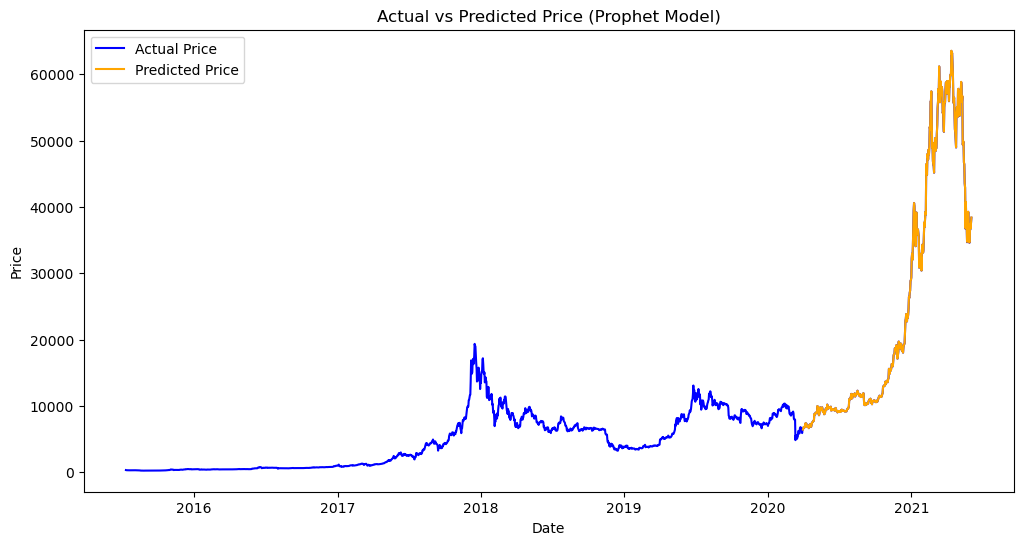

In [125]:
plot_actual_vs_predicted(df_ma, predictions_fbp_ma)

In [126]:
calculate_metrics(test_fbp_ma['y'], predictions_fbp_ma['yhat'])

Mean Absolute Error (MAE): 7.982752019834585
Mean Squared Error (MSE): 215.36453862664615
Root Mean Squared Error (RMSE): 14.675303697935732
Mean Absolute Percentage Error (MAPE): nan%
R-squared (R²): 0.999999363295385


{'MAE': 7.982752019834585,
 'MSE': 215.36453862664615,
 'RMSE': 14.675303697935732,
 'MAPE': nan,
 'R²': 0.999999363295385}

In [127]:
from prophet.diagnostics import cross_validation, performance_metrics
cv_results = cross_validation(
    model_fbp_ma,
    initial='365 days',  # Initial training set size
    period='30 days',    # Step size for rolling window
    horizon='90 days'    # Forecast horizon
)

# Calculate performance metrics
# Metrics available: 'mse', 'rmse', 'mae', 'mape', 'coverage'
performance = performance_metrics(cv_results)

# Display the performance metrics
print(performance[['horizon', 'rmse', 'mae', 'mape']])


Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/43 [00:00<?, ?it/s]

0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
11:13:08 - cmdstanpy - INFO - Chain [1] start processing
11:13:08 - cmdstanpy - INFO - Chain [1] done processing
11:13:08 - cmdstanpy - INFO - Chain [1] start processing
11:13:09 - cmdstanpy - INFO - Chain [1] done processing
11:13:09 - cmdstanpy - INFO - Chain [1] start processing
11:13:09 - cmdstanpy - INFO - Chain [1] done processing
11:13:09 - cmdstanpy - INFO - Chain [1] start processing
11:13:10 - cmdstanpy - INFO - Chain [1] done processing
11:13:10 - cmdstanpy - INFO - Chain [1] start processing
11:13:10 - cmdstanpy - INFO - Chain [1] done processing
11:13:10 - cmdstanpy - INFO - Chain [1] start processing
11:13:11 - cmdstanpy - INFO - Chain [1] done processing
11:13:11 - cmdst

   horizon       rmse        mae      mape
0   9 days   1.119085   0.662666  0.000134
1  10 days   1.216942   0.718561  0.000146
2  11 days   1.317904   0.773526  0.000158
3  12 days   1.426159   0.830667  0.000171
4  13 days   1.544553   0.892259  0.000185
5  14 days   1.675260   0.958893  0.000199
6  15 days   1.815006   1.029591  0.000213
7  16 days   1.964567   1.104176  0.000228
8  17 days   2.122907   1.180035  0.000243
9  18 days   2.288890   1.258593  0.000258
10 19 days   2.461961   1.340166  0.000274
11 20 days   2.643032   1.424826  0.000290
12 21 days   2.833119   1.514510  0.000307
13 22 days   3.028503   1.604324  0.000326
14 23 days   3.227134   1.693751  0.000344
15 24 days   3.434259   1.786281  0.000363
16 25 days   3.644985   1.879223  0.000381
17 26 days   3.862460   1.973968  0.000402
18 27 days   4.090209   2.072954  0.000422
19 28 days   4.326830   2.175758  0.000445
20 29 days   4.569929   2.282405  0.000467
21 30 days   4.816365   2.389415  0.000489
22 31 days 

In [128]:
print(performance[['horizon', 'rmse', 'mae', 'mape']])

   horizon       rmse        mae      mape
0   9 days   1.119085   0.662666  0.000134
1  10 days   1.216942   0.718561  0.000146
2  11 days   1.317904   0.773526  0.000158
3  12 days   1.426159   0.830667  0.000171
4  13 days   1.544553   0.892259  0.000185
5  14 days   1.675260   0.958893  0.000199
6  15 days   1.815006   1.029591  0.000213
7  16 days   1.964567   1.104176  0.000228
8  17 days   2.122907   1.180035  0.000243
9  18 days   2.288890   1.258593  0.000258
10 19 days   2.461961   1.340166  0.000274
11 20 days   2.643032   1.424826  0.000290
12 21 days   2.833119   1.514510  0.000307
13 22 days   3.028503   1.604324  0.000326
14 23 days   3.227134   1.693751  0.000344
15 24 days   3.434259   1.786281  0.000363
16 25 days   3.644985   1.879223  0.000381
17 26 days   3.862460   1.973968  0.000402
18 27 days   4.090209   2.072954  0.000422
19 28 days   4.326830   2.175758  0.000445
20 29 days   4.569929   2.282405  0.000467
21 30 days   4.816365   2.389415  0.000489
22 31 days 

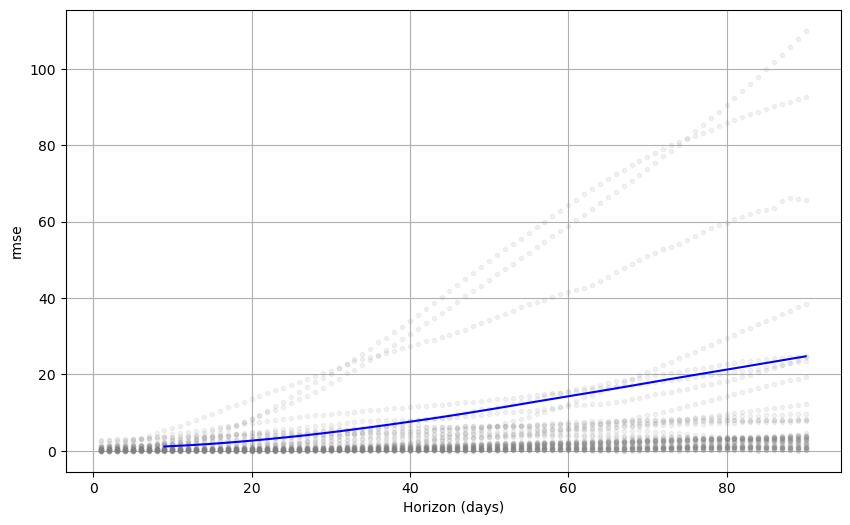

In [129]:
from prophet.plot import plot_cross_validation_metric

# Plot RMSE over the forecast horizon
fig = plot_cross_validation_metric(cv_results, metric='rmse')

In [133]:
df_ma.head(1)


,ds,y,open,high,low,vol.,change %,SMA_1_day,SMA_7_days,SMA_1_month,SMA_3_months,SMA_6_months,SMA_1_year,EMA_1_day,EMA_7_days,EMA_1_month,EMA_3_months,EMA_6_months,EMA_1_year
0,2015-07-12,310.4,292.0,315.9,291.3,120700.0,6.33,310.4,NaN,NaN,NaN,NaN,NaN,310.4,310.4,310.4,310.4,310.4,310.4


## With Both Lag and MA

In [134]:
df_n.head(1)

,ds,y,open,high,low,vol.,change %,lag1_open,lag1_vol,lag1_change_pct
0,2015-07-12,310.4,292.0,315.9,291.3,120700.0,6.33,0.0,0.0,0.0


In [136]:
df_lag_ma = pd.merge(
        df_n[['ds', 'y', 'open', 'high', 'low', 'vol.', 'change %', 'lag1_open', 'lag1_vol', 'lag1_change_pct']], 
        df_ma[['ds', 'EMA_1_day', 'EMA_7_days', 'EMA_3_months', 'EMA_1_year']], 
        on='ds', 
        how='inner'
    )

In [137]:
df_lag_ma.head(1)

,ds,y,open,high,low,vol.,change %,lag1_open,lag1_vol,lag1_change_pct,EMA_1_day,EMA_7_days,EMA_3_months,EMA_1_year
0,2015-07-12,310.4,292.0,315.9,291.3,120700.0,6.33,0.0,0.0,0.0,310.4,310.4,310.4,310.4


In [138]:
# Split into training and testing sets (80-20 split)
train_size_fbp_lag_ma = int(len(df_lag_ma) * 0.8)
train_fbp_lag_ma = df_lag_ma.iloc[:train_size_fbp_lag_ma]
test_fbp_lag_ma = df_lag_ma.iloc[train_size_fbp_lag_ma:]

In [139]:
# Create the Prophet model
model_fbp_lag_ma = Prophet()

# Add additional regressors
# Adding the selected columns as regressors
lag_ma_regressors = ['lag1_open', 'lag1_vol', 'lag1_change_pct','EMA_1_day', 'EMA_7_days', 'EMA_3_months', 'EMA_1_year' ]
for reg in lag_ma_regressors:
    model_fbp_lag_ma.add_regressor(reg)

# Fit the model
model_fbp_lag_ma.fit(train_fbp_lag_ma)

11:54:17 - cmdstanpy - INFO - Chain [1] start processing
11:54:19 - cmdstanpy - INFO - Chain [1] done processing


In [140]:
future_test_lag_ma = test_fbp_lag_ma[
        ['ds', 'lag1_open', 'lag1_vol', 'lag1_change_pct','EMA_1_day', 'EMA_7_days', 'EMA_3_months', 'EMA_1_year']
    ]
# Predict the future values
forecast_fbp_lag_ma = model_fbp_lag_ma.predict(future_test_lag_ma)
# Extract the predicted values for the test period
predictions_fbp_lag_ma = forecast_fbp_lag_ma[['ds', 'yhat']]


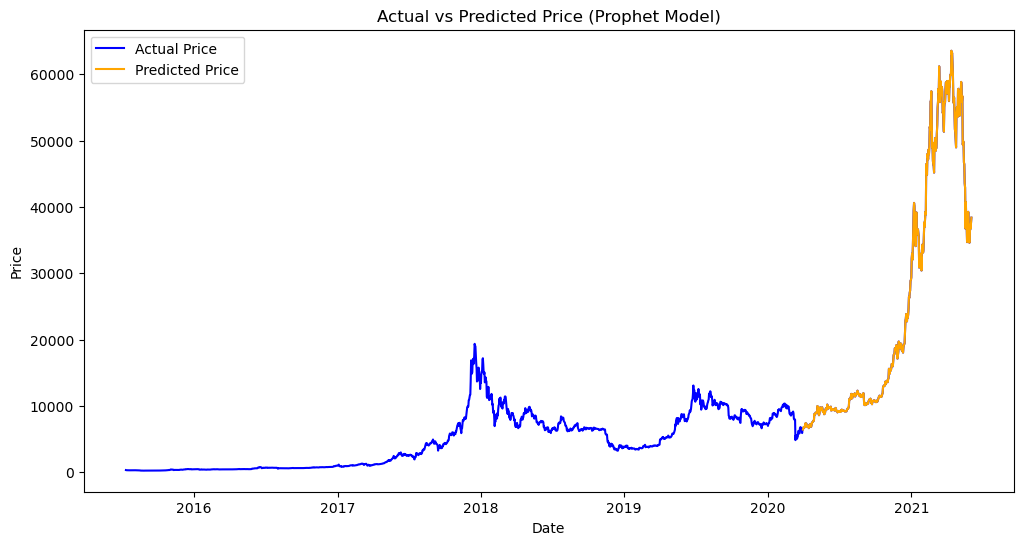

In [141]:
plot_actual_vs_predicted(df_lag_ma, predictions_fbp_lag_ma)

In [142]:
calculate_metrics(test_fbp_lag_ma['y'], predictions_fbp_lag_ma['yhat'])

Mean Absolute Error (MAE): 2.8628475483966698
Mean Squared Error (MSE): 24.923788462343428
Root Mean Squared Error (RMSE): 4.9923730291659325
R-squared (R²): 0.9999999263152084


{'MAE': 2.8628475483966698,
 'MSE': 24.923788462343428,
 'RMSE': 4.9923730291659325,
 'R²': 0.9999999263152084}